In [114]:
import numpy as np
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import scipy
import scipy.linalg

## Введение в линейную алгебру

5\.1 Вектор – это частный случай матрицы 1xN и Nx1. Повторите материал для векторов, уделяя особое внимание умножению $A \cdot B$.
Вычислите, по возможности не используя программирование: $(5Е)^{–1}$, где Е – единичная матрица размера 5x5.

$$
(5E)^{-1} = 5^{-1} \cdot E^{-1} = 0.2E = 
\begin{bmatrix} 
    0.2 & 0 & 0 & 0 & 0 \\
    0 & 0.2 & 0 & 0 & 0 \\
    0 & 0 & 0.2 & 0 & 0 \\
    0 & 0 & 0 & 0.2 & 0 \\
    0 & 0 & 0 & 0 & 0.2 \\
\end{bmatrix} 
$$

5\.2 Вычислите определитель:

$$
\begin{vmatrix} 
    1 & 2 & 3 \\
    4 & 0 & 6 \\
    7 & 8 & 9 \\
\end{vmatrix}
= 1 \cdot 
\begin{vmatrix} 
    0 & 6 \\
    8 & 9 \\
\end{vmatrix}
- 2 \cdot 
\begin{vmatrix} 
    4 & 6 \\
    7 & 9 \\
\end{vmatrix}
+ 3 \cdot
\begin{vmatrix} 
    4 & 0 \\
    7 & 8 \\
\end{vmatrix} 
= \\
= 1 \cdot (-48) - 2 \cdot (-6) + 3 \cdot 32 = 60
$$

5.3.1 Вычислите матрицу, обратную данной:

$$
A =
\begin{bmatrix} 
    1 & 2 & 3  \\
    4 & 0 & 6  \\
    7 & 8 & 9
\end{bmatrix} 
$$

$$
A^{-1} = \frac{A_*^T}{detA}
$$

$$
A_* = 
\begin{bmatrix} 
    -48 & -6 & 32 \\
    6 & -12 & 6 \\
    12 & 6 & -8
\end{bmatrix} 
$$

$$
A_*^T = 
\begin{bmatrix} 
    -48 & 6 & 12 \\
    -6 & -12 & 6 \\
    32 & 6 & -8
\end{bmatrix} 
$$

$$detA = -60$$

Получили что 

$$
A^{-1} = 
\begin{bmatrix} 
    -0.8 & 0.1 & 0.2 \\
    -0.1 & -0.2 & 0.1 \\
    8/15 & 0.1 & -2/15
\end{bmatrix} 
$$

5.3.2 Приведите пример матрицы 4x4, ранг которой равен 1.

$$
\begin{bmatrix} 
    1 & 2 & 3 & 4 \\
    2 & 4 & 6 & 8 \\
    3 & 6 & 9 & 12 \\
    4 & 8 & 12 & 16 \\
\end{bmatrix} 
$$

5.4 Вычислите скалярное произведение двух векторов: (1, 5) и (2, 8).

Ответ: 42

5.5 Вычислите смешанное произведение трех векторов: (1, 5, 0), (2, 8, 7) и (7, 1.5, 3).

$$\vec{a} = (1, 5, 0)$$
$$\vec{b} = (2, 8, 7)$$
$$\vec{c} = (7, 1.5, 3)$$

$$
(\vec{a}\times\vec{b})\cdot{\vec{c}} = (35, -7, -2)\cdot{(7, 1.5, 3)} = 228.5
$$

## Системы линейных алгебраических уравнений

6\.1 Решите линейную систему:

$$
\begin{bmatrix}
1 & 2 & 3 \\
4 & 0 & 6 \\
7 & 8 & 9
\end{bmatrix} 
\cdot X = 
\begin{bmatrix}
12 \\
2 \\
1
\end{bmatrix} 
$$

In [115]:
A = np.array([[1,2,3],[4,0,6],[7,8,9]])
B = np.array([12,2,1])
x1, x2, x3 = np.linalg.solve(A, B)
print('Решения системы уравнений: x1=%.2f, x2=%.2f, x3=%.2f.' % (x1, x2, x3))

Решения системы уравнений: x1=-9.20, x2=0.90, x3=6.47.


In [116]:
A1 = np.linalg.inv(A)
print(A1)
print("det=", np.linalg.det(A))
x1, x2, x3 = np.dot(A1, B)
print('Решения системы уравнений: x1=%.2f, x2=%.2f, x3=%.2f.' % (x1, x2, x3))

[[-0.8         0.1         0.2       ]
 [ 0.1        -0.2         0.1       ]
 [ 0.53333333  0.1        -0.13333333]]
det= 59.999999999999986
Решения системы уравнений: x1=-9.20, x2=0.90, x3=6.47.


В обоих случаях получили одинаковый ответ x1=-9.2, x2=0.9, x3=6.47.

6\.2 Найдите псевдорешение:

$$
\begin{cases}
x + 2y - z = 1 \\
3x - 4y = 7 \\
8x - 5y + 2z = 12 \\
2x - 5z = 7 \\
11x + 4y - 7z = 15 \\
\end{cases}
$$

In [117]:
A = np.array([[1,2,-1],[3,-4,0],[8,-5,2],[2,0,-5],[11,4,-7]])
B = np.array([1,7,12,7,15])
roots, nev, rang, _  = np.linalg.lstsq(A, B, rcond=None)
print( \
      'Псевдорешение x=%.3f, y=%.3f, z=%.3f. Невязка %.3f. Ранг матрицы А равен %d.' % \
      (roots[0], roots[1], roots[2], nev[0], rang) \
)

Псевдорешение x=1.139, y=-0.905, z=-0.901. Невязка 0.715. Ранг матрицы А равен 3.


In [118]:
# Приближенные значения правой части системы уравнений с найденными корнями
np.dot(A, roots)

array([ 0.23020495,  7.03751834, 11.83650981,  6.78328855, 15.21805313])

In [119]:
# Невязка решений
np.dot(A, roots) - B

array([-0.76979505,  0.03751834, -0.16349019, -0.21671145,  0.21805313])

In [120]:
# Норма невязки
np.linalg.norm(np.dot(A, roots) - B)**2

0.7152321111819713

6\.3 Сколько решений имеет линейная система:

$$
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{bmatrix} 
\cdot X = 
\begin{bmatrix}
12 \\
2 \\
1
\end{bmatrix} 
$$

Если ноль – то измените вектор правой части так, чтобы система стала совместной, и решите ее.

In [121]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
B = np.array([12,2,1])
print('det =', np.linalg.det(A))
print('rang =', np.linalg.matrix_rank(A))

det = -9.51619735392994e-16
rang = 2


Определитель матрицы равен нулю и она не совместна. Чтобы система стала совместной, нужно сделать её недоопределённой. Третья строка коэффициентов матрицы $A$ выражается черех первые две как $A_3 = 2A_2 - A_1$. Следующая система уравнений уже будет иметь решения:

$$
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{bmatrix} 
\cdot X = 
\begin{bmatrix}
12 \\
2 \\
-8
\end{bmatrix} 
$$

Данная сисстема уравнений имеет множество решений:

$$
\begin{cases}
x = t - \frac{56}{3} \\
y = -2t + \frac{46}{3} \\
z = t
\end{cases}
$$

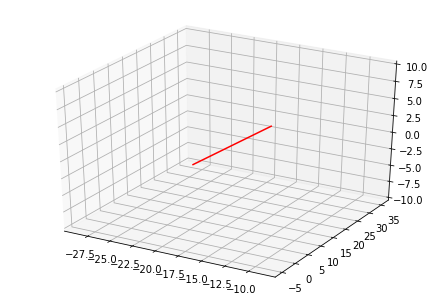

In [122]:
fig = figure()
ax = Axes3D(fig)
t = np.linspace(-10, 10, 101)
x = t - 56/3
y = -2*t+46/3
z = t
ax.plot3D(x, y, z, 'r')

6\.4 Вычислите LU-разложение матрицы:

\begin{bmatrix}
1 & 2 & 3 \\
2 & 16 & 21 \\
4 & 28 & 73
\end{bmatrix} 

После этого придумайте вектор правых частей и решите полученную линейную систему трех уравнений с данной матрицей.

In [123]:
A = np.array([[1,2,3], [2,16,21], [4,28,73]])
P, L, U = scipy.linalg.lu(A)

print(P)
print(L)
print(U)
print(A - np.dot(P, np.dot(L,U)))

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]
[[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


Получили что выполняется равенство $A = P \cdot L \cdot U$, хотя по видеоуроку, должно выполняться равенство $P \cdot A = L \cdot U$. Этот момент не понятен :) 

Примем вектор правых частей (5, 31, 19).

$$
\begin{bmatrix}
1 & 2 & 3 \\
2 & 16 & 21 \\
4 & 28 & 73
\end{bmatrix} 
\cdot
\begin{bmatrix}
X_1 \\
X_2 \\
X_3
\end{bmatrix} = 
\begin{bmatrix}
5 \\
31 \\
19
\end{bmatrix}
$$

$$
\begin{bmatrix}
0 & 1 & 0 \\
0 & 0 & 1 \\
1 & 0 & 0
\end{bmatrix} 
\cdot
\begin{bmatrix}
1 & 0 & 0 \\
0.25 & 1 & 0 \\
0.5 & -0.4 & 1
\end{bmatrix} 
\cdot
\begin{bmatrix}
4 & 28 & 73 \\
0 & -5 & -15.25 \\
0 & 0 & -21.6
\end{bmatrix} 
\cdot
\begin{bmatrix}
X_1 \\
X_2 \\
X_3
\end{bmatrix} = 
\begin{bmatrix}
5 \\
31 \\
19
\end{bmatrix}
$$


Сделаем замену

$$
\begin{bmatrix}
4 & 28 & 73 \\
0 & -5 & -15.25 \\
0 & 0 & -21.6
\end{bmatrix} 
\cdot
\begin{bmatrix}
X_1 \\
X_2 \\
X_3
\end{bmatrix} = 
\begin{bmatrix}
Y_1 \\
Y_2 \\
Y_3
\end{bmatrix}
$$

$$
\begin{bmatrix}
0 & 1 & 0 \\
0 & 0 & 1 \\
1 & 0 & 0
\end{bmatrix} 
\cdot
\begin{bmatrix}
1 & 0 & 0 \\
0.25 & 1 & 0 \\
0.5 & -0.4 & 1
\end{bmatrix} 
\cdot
\begin{bmatrix}
Y_1 \\
Y_2 \\
Y_3
\end{bmatrix} = 
\begin{bmatrix}
5 \\
31 \\
19
\end{bmatrix}
$$

$$
\begin{bmatrix}
0.25 & 1 & 0 \\
0.5 & -0.4 & 1 \\
1 & 0 & 0 
\end{bmatrix} 
\cdot
\begin{bmatrix}
Y_1 \\
Y_2 \\
Y_3
\end{bmatrix} = 
\begin{bmatrix}
5 \\
31 \\
19
\end{bmatrix}
$$

Получили $Y_1 = 19; Y_2 = 0.25; Y_3 = 21.6$. Сделаем обратную подстановку:

$$
\begin{bmatrix}
4 & 28 & 73 \\
0 & -5 & -15.25 \\
0 & 0 & -21.6
\end{bmatrix} 
\cdot
\begin{bmatrix}
X_1 \\
X_2 \\
X_3
\end{bmatrix} = 
\begin{bmatrix}
19 \\
0.25 \\
21.6
\end{bmatrix}
$$

Ответ: $X_3 = -1; X_2 = 3; X_1 = 2$.

6\.5 Найдите нормальное псевдорешение недоопределенной системы:

\begin{cases}
x + 2y – z = 1 \\
8x – 5y + 2z = 12
\end{cases}

Для этого определите функцию Q(x,y,z), равную норме решения, и найдите ее минимум.

In [124]:
def Q(x, y, z):
    return (x**2 + y**2 + z**2)

def Y(x):
    return 10*x-14

def Z(x):
    return x+2*Y(x)-1

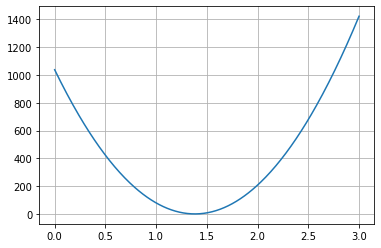

In [125]:
x = np.linspace(0, 3, 301)
y = Y(x)
z = Z(x)
plt.plot(x, Q(x, y, z))
plt.grid()
plt.show()

In [126]:
A = np.array([[1,2,-1], [8,-5,2]])
B = np.array([1,12])

roots, nev, rang, _  = np.linalg.lstsq(A, B, rcond=None)
print('Нормальное псевдорешение x=%.3f, y=%.3f, z=%.3f.' % (roots[0], roots[1], roots[2]))

Нормальное псевдорешение x=1.382, y=-0.181, z=0.020.


6\.6 Найдите одно из псевдорешений вырожденной системы:

$$
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{bmatrix} 
\cdot X = 
\begin{bmatrix}
2 \\
5 \\
11
\end{bmatrix} 
$$

Попробуйте также отыскать и нормальное псевдорешение.

In [127]:
A = np.array([[1,2,3], [4,5,6], [7,8,9]])
print(A)
# проверим что система не совместна и найдём ранг матрицы A
det = np.linalg.det(A)
rang = np.linalg.matrix_rank(A)
print('Определитель равен %.3f, ранг матрицы %d.' % (det, rang))

[[1 2 3]
 [4 5 6]
 [7 8 9]]
Определитель равен -0.000, ранг матрицы 2.


In [128]:
B = np.array([2, 5, 11])
Q, R = np.linalg.qr(A)

print(Q)
print(R)

[[-0.12309149  0.90453403  0.40824829]
 [-0.49236596  0.30151134 -0.81649658]
 [-0.86164044 -0.30151134  0.40824829]]
[[-8.12403840e+00 -9.60113630e+00 -1.10782342e+01]
 [ 0.00000000e+00  9.04534034e-01  1.80906807e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.11164740e-15]]


In [129]:
# проверка правильности разложения: QR == A
print(np.dot(Q, R) - A)
# проверка ортогональности матрицы Q
print(np.dot(np.transpose(Q), Q))

[[4.44089210e-16 6.21724894e-15 7.99360578e-15]
 [0.00000000e+00 2.66453526e-15 3.55271368e-15]
 [0.00000000e+00 3.55271368e-15 5.32907052e-15]]
[[ 1.00000000e+00 -5.26517217e-16 -2.55176183e-16]
 [-5.26517217e-16  1.00000000e+00  3.37757775e-16]
 [-2.55176183e-16  3.37757775e-16  1.00000000e+00]]


Псевдорешение выражается формулой $R_1 \cdot X_1 = Q^T \cdot B - R_2 \cdot X_2$. Так как ранг исходной матрицы $A$ равен 2, то размерность подматрицы $R_1$ тоже будет 2x2. 

In [130]:
R1 = R[:2, :2]
R1

array([[-8.1240384 , -9.6011363 ],
       [ 0.        ,  0.90453403]])

In [131]:
B1 = np.dot(np.transpose(Q), B)[:2]
B1

array([-1.21860576e+01,  8.54871729e-15])

In [132]:
X1 = np.linalg.solve(R1, B1)
X1

array([1.50000000e+00, 9.45096256e-15])

In [133]:
# дополняем решение нулевой матрицей X2
X = np.append(X1, 0)
# норма найденного псевдорешения
norm = np.linalg.norm(X)
# невязка найденного псевдорешения
nev = np.linalg.norm(np.dot(A, X) - B)

print('Одно из псевдорешений исходной системы уравнений: x1=%.2f, x2=%.2f, x3=%.2f.' % (X[0], X[1], X[2]))
print('Норма найденного псевдорешения %.3f. Невязка %.3f.' % (norm, nev))

Одно из псевдорешений исходной системы уравнений: x1=1.50, x2=0.00, x3=0.00.
Норма найденного псевдорешения 1.500. Невязка 1.225.


Найдём нормальное псевдорешение с минимальной нормой вектора X.

In [134]:
def Q(x, y, z):
    return (x**2 + y**2 + z**2)

def Y(x):
    return 10*x-14

def Z(x):
    return x+2*Y(x)-1

In [135]:
roots = np.linalg.lstsq(A, B, rcond=None)[0]
norm = np.linalg.norm(roots)
nev = np.linalg.norm(np.dot(A, roots) - B)
print( \
    'Нормальное псевдорешение x1=%.2f, x2=%.2f, x3=%.2f. Его норма %.3f меньше нормы предыдущего решения. Невязка %.3f такая же, как и у предыдущего решения.' \
    % (roots[0], roots[1], roots[2], norm, nev) \
 )

Нормальное псевдорешение x1=1.25, x2=0.50, x3=-0.25. Его норма 1.369 меньше нормы предыдущего решения. Невязка 1.225 такая же, как и у предыдущего решения.
